1. Create a business case (everything needs a goal - finding most profitable customer groups)
2. Preparing data (find patterns & trends, set of features depending on the most important metrics for business following by preprocessing the data to remove inconsistency)
3. Data analysis & exploration (finding relations & patterns) - better understand customers interests, choices & purchasing patterns so that you know which attributes are more closely related to customer & business as well
4. Clustering analysis (math model to discover groups of similar customers based on finding variations among customers within each group). Goal: accurately segment customers in order to achieve more effective customer marketing via personalisation. Ex: k-means clustering analysis
5. Choosing optimal hyperparameters (known as tuning) 
6. Visualization & interpretation: which client has the highest retention rate?

# Types of segmentation factors


*   Demographic: age, gender, income, location, education, ethnicity
*   Psychographic: interests, lifestyle, psychological influences, motivations, priorities
* Behavioral (actions): purchasing habits, spending habits, user status, brand interactions
* Geographic: ZIP code, city, country, climate, urban/rural






# Advantages of Customer Segmentation

* price optimization (understanding customer & his financial status) - helps in better allocation of resources which in return helps to gain economies 
* enhances competitiveness (the more the retention of the customer, the more revenue generated - all of this will enhance competitiveness in the market)
* brand awareness (after segmenting customers you can make them well aware of your brand) increasing goodwill in the market & the brand value established among competitors
* acquisition & retention: personalised connection with customers will help satisfy customers needs
*  increases revenue & ROI: more purchases when users get exactly what they need (segmented & targeted emails generate 60% of revenue of company)



# Unsupervised learning 
- training machine using info that is neither classified not labeled 

K-means algo (to choose optimal value of K value): Elbow method or purpose-based

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Genre':'Gender'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape
# rows, columns

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.drop(["CustomerID"], axis=1, inplace=True)
# axis=1, as we drop column in this case

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

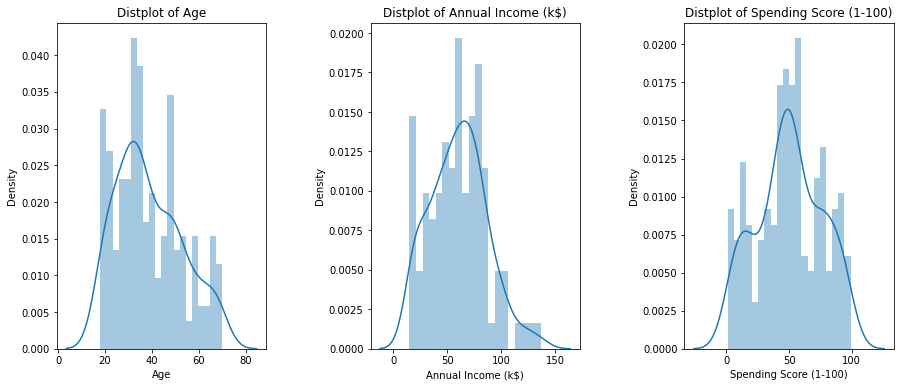

In [9]:
# distribution plot to compare
plt.figure(1, figsize=(15, 6))
n = 0
# representing graphs of 3 variables
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  # number of rows, columns, index incremented
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

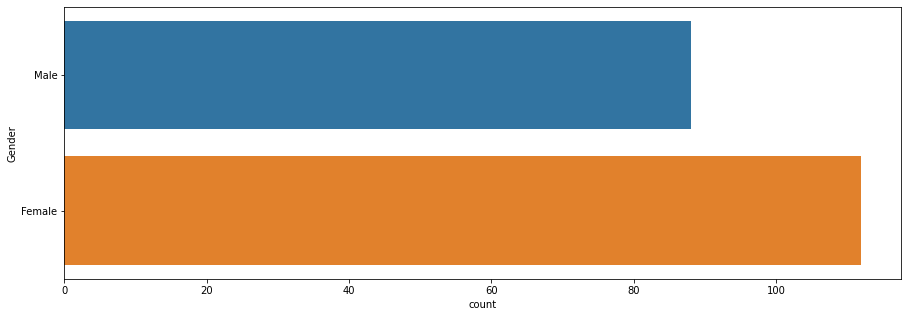

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(y = 'Gender', data = df)
plt.show()

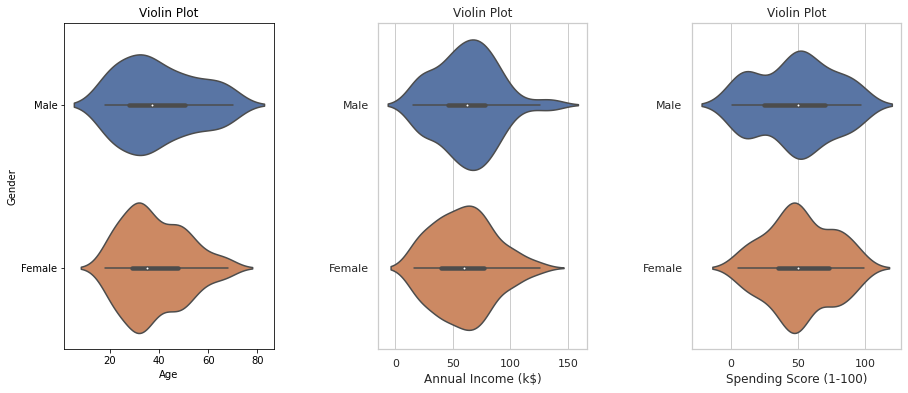

In [11]:
# distribution plot to compare
plt.figure(1, figsize=(15, 6))
n = 0
# representing graphs of 3 variables
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  # number of rows, columns, index incremented
  plt.subplot(1, 3, n)
  sns.set(style='whitegrid')
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x = cols, y = 'Gender', data = df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin Plot')
plt.show()

- high density in female at 30 y.o. compared to men
- density is high around 60k$ 

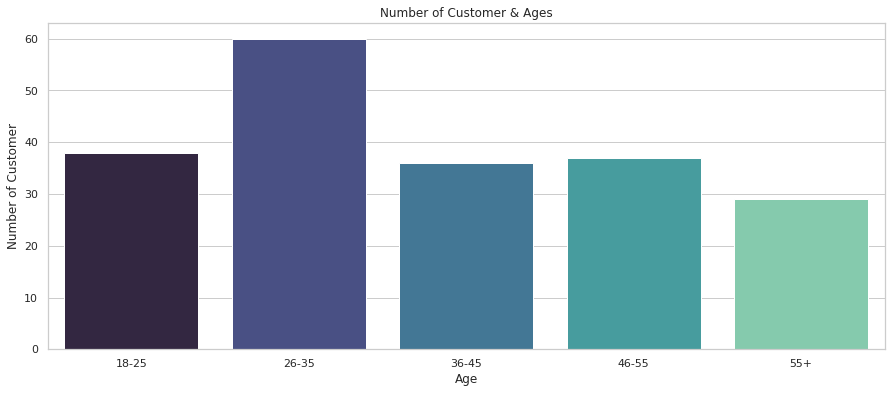

In [12]:
# dividing age into categories, understand which range of age has highest number of customers 
# having min age 18 & max 70
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), 
        len(age_46_55.values), len(age_55above.values)]
plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey, palette = "mako")
plt.title("Number of Customer & Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

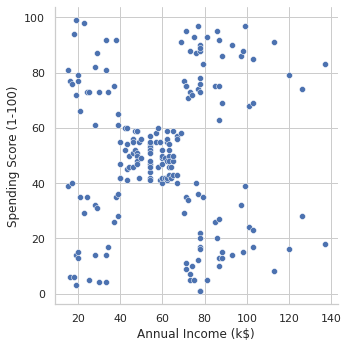

In [13]:
sns.relplot(x = "Annual Income (k$)", y = 'Spending Score (1-100)', data = df)

##### not much relationship, but from 40k - 60k there is some relation  

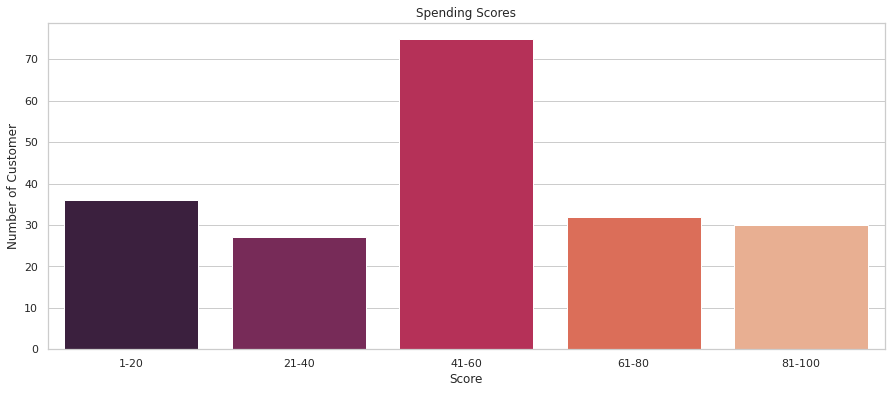

In [14]:
# let's divide spending score into categories
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

# number of customers present in each divided category
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), 
        len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette = "rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer")
plt.show()

Maximum number of our customers have spending score between 41-60k.

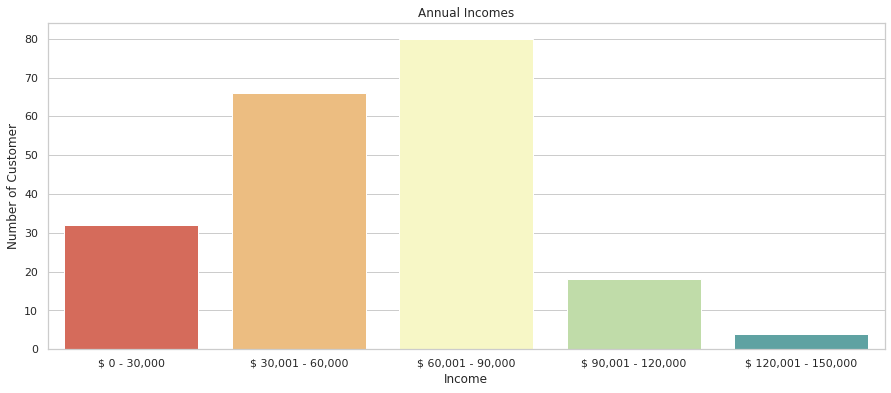

In [15]:
# let's divide annual income into categories
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 1) & (df["Annual Income (k$)"] <= 30)]
ai0_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai0_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai0_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai0_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

# number of customers present in each divided category
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai0_60.values), len(ai0_90.values), 
        len(ai0_120.values), len(ai0_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = aix, y = aiy, palette = "Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

Most customers have annual income that lies between $60,001 and 90,000

Clustering process:
- find out optimal number of clusters that we need to create for two variables: age & spending score

Forming clusters based on Age & Spending Score 

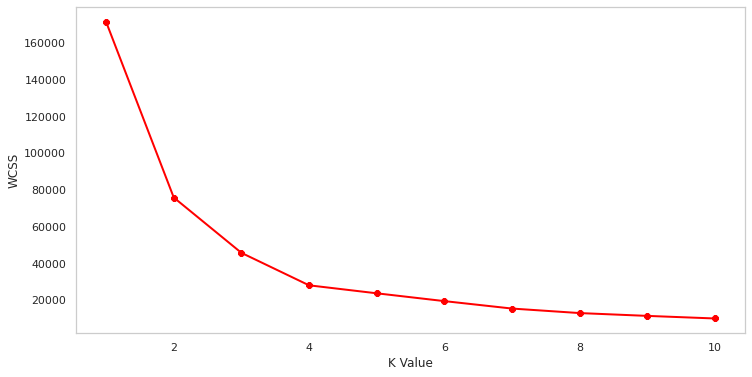

In [18]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
# sum of squares method
wcss = [] 
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, init = "k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

Our graph seems to be constant after K = 4

In [19]:
# initializing class object
kmeans = KMeans(n_clusters = 4)

# predicting labels of clusters
label = kmeans.fit_predict(X1)

print(label)

[2 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 2 2 3 0 2 0 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3
 0 3 0 1 0 1 2 3 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 2 2 2 2 1 1 1 1 2 2 2 0 2 0 1 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 1 0
 3 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 0 3 0 3 0 2
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


You may see that our data is divided into 4 clusters - [0, 1, 2, 3]

In [20]:
# checking the centroids
print(kmeans.cluster_centers_)
# X, Y coordinates

[[30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


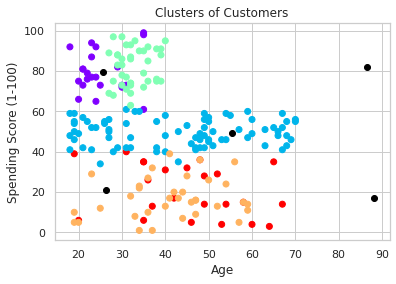

In [27]:
# let's visualize clusters on the graph
plt.scatter(X1[:,0], X1[:,1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
# cluster centers are marked as black
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

Forming clusters based on Annual Income & Spending Score 

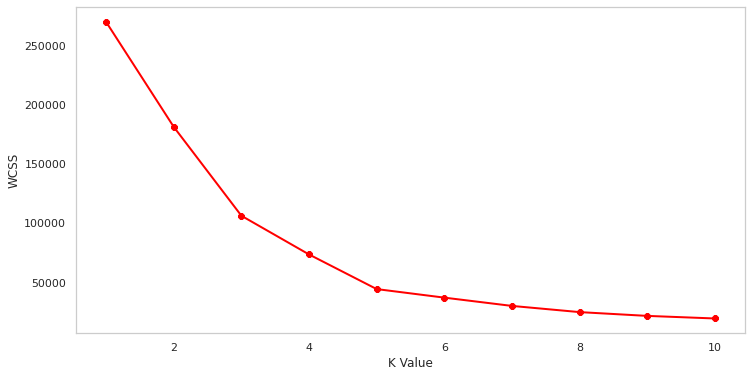

In [22]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
# sum of squares method
wcss = [] 
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, init = "k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

There is a sharp band at around K = 5 after which the graph is very constant. 

In [23]:
# initializing class object
kmeans = KMeans(n_clusters = 5)

# predicting labels of clusters
label = kmeans.fit_predict(X2)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


You may see that our data is divided into 5 clusters - [0, 1, 2, 3, 4]

In [24]:
# checking the centroids
print(kmeans.cluster_centers_)
# X, Y coordinates

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


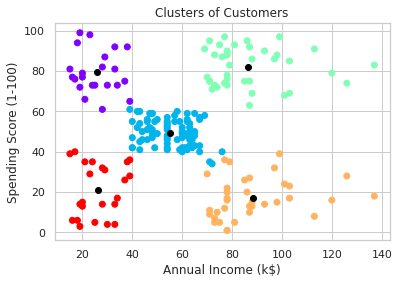

In [28]:
# let's visualize clusters on the graph
plt.scatter(X2[:,0], X2[:,1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
# cluster centers are marked as black
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Include Age, Annual Income and Spending Score.

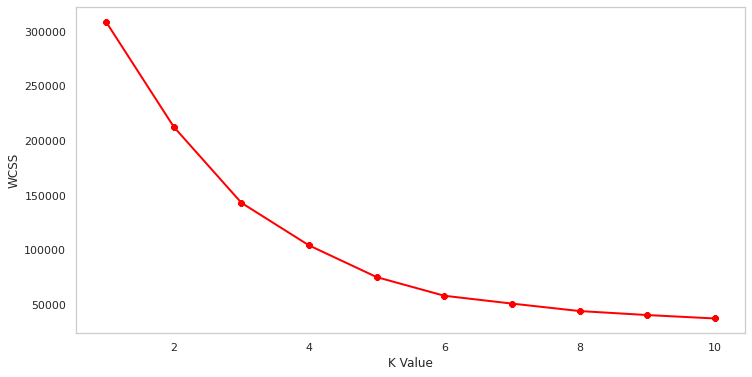

In [29]:
# included all the columns from 1 to the last
X3 = df.iloc[:, 1:]
wcss = [] 
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, init = "k-means++")
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

Here, after K = 5 graph seems to be pretty const. 

In [30]:
# initializing class object
kmeans = KMeans(n_clusters = 5)

# predicting labels of clusters
label = kmeans.fit_predict(X3)

print(label)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [31]:
# checking the centroids
print(kmeans.cluster_centers_)
# X, Y, Z coordinates

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]]


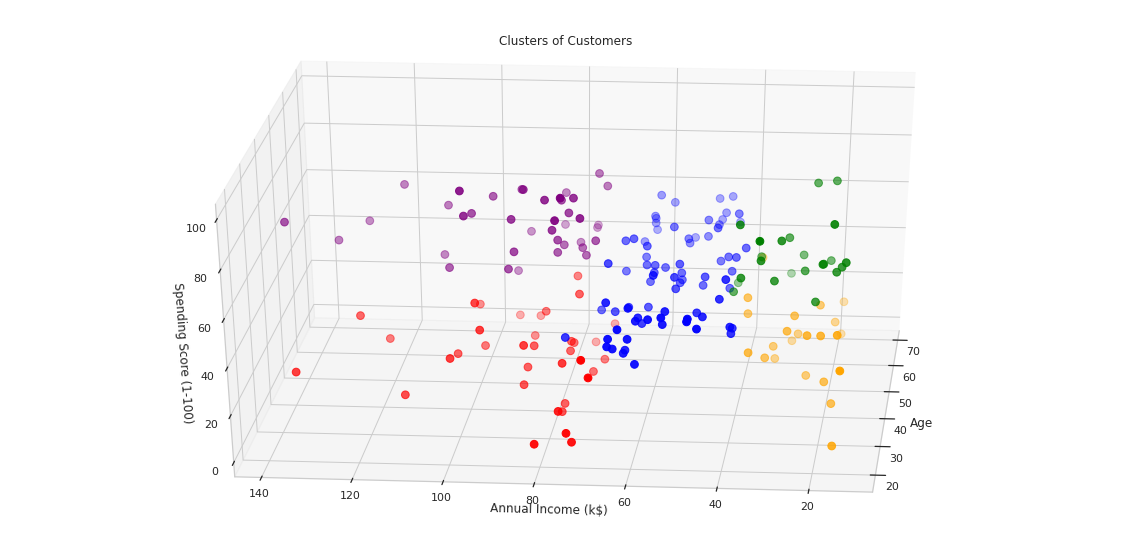

In [32]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c = 'purple', s = 60)
ax.view_init(30, 185)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()